## nba_players_points

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
nba = pd.read_csv("nba_2013.csv")


In [160]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [161]:
nba.shape

(481, 31)

In [162]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [163]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [164]:
nba_new=nba.drop('bref_team_id',axis=1,inplace=True)
nba_new=nba.drop('season',axis=1)
nba_new.head()

,player,pos,age,g,gs,mp,fg,fga,fg.,x3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,Quincy Acy,SF,23,63,0,847,66,141,0.468,4,...,72,144,216,28,23,26,30,122,171,2013
1,Steven Adams,C,20,81,20,1197,93,185,0.503,0,...,142,190,332,43,40,57,71,203,265,2013
2,Jeff Adrien,PF,27,53,12,961,143,275,0.520,0,...,102,204,306,38,24,36,39,108,362,2013
3,Arron Afflalo,SG,28,73,73,2552,464,1011,0.459,128,...,32,230,262,248,35,3,146,136,1330,2013
4,Alexis Ajinca,C,25,56,30,951,136,249,0.546,0,...,94,183,277,40,23,46,63,187,328,2013


In [165]:
nba_new.isnull().sum()

player         0
pos            0
age            0
g              0
gs             0
mp             0
fg             0
fga            0
fg.            2
x3p            0
x3pa           0
x3p.          67
x2p            0
x2pa           0
x2p.           3
efg.           2
ft             0
fta            0
ft.           20
orb            0
drb            0
trb            0
ast            0
stl            0
blk            0
tov            0
pf             0
pts            0
season_end     0
dtype: int64

In [166]:
nba_new.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [167]:
pd.get_dummies(nba_new).shape

(481, 515)

In [168]:
len(nba_new['player'].unique())

481

In [169]:
len(nba_new['pos'].unique())

7

In [170]:
nba_new.player.value_counts().to_dict()

{'Ray Allen': 1,
 'Jeff Adrien': 1,
 'Taj Gibson': 1,
 'C.J. Watson': 1,
 'Ronny Turiaf': 1,
 'Manny Harris': 1,
 'Greg Oden': 1,
 'Diante Garrett': 1,
 'Channing Frye': 1,
 'Tony Mitchell': 1,
 'Jeremy Lin': 1,
 'Wesley Matthews': 1,
 'J.R. Smith': 1,
 'Mario Chalmers': 1,
 'Randy Foye': 1,
 'Ed Davis': 1,
 'Will Bynum': 1,
 'Adonis Thomas': 1,
 'Bradley Beal': 1,
 'Tayshaun Prince': 1,
 'John Henson': 1,
 'Kyle Korver': 1,
 'Luke Babbitt': 1,
 'Dionte Christmas': 1,
 'Kris Humphries': 1,
 'Shane Larkin': 1,
 'Jared Sullinger': 1,
 'Tornike Shengelia': 1,
 'Isaiah Thomas': 1,
 'Reggie Bullock': 1,
 'Rashard Lewis': 1,
 'Jeff Withey': 1,
 'Nick Young': 1,
 'Marco Belinelli': 1,
 'James Southerland': 1,
 'Isaiah Canaan': 1,
 'Blake Griffin': 1,
 'Josh Childress': 1,
 'Jodie Meeks': 1,
 'Tyshawn Taylor': 1,
 'Tim Duncan': 1,
 'Klay Thompson': 1,
 'Paul Pierce': 1,
 'Zaza Pachulia': 1,
 'Derrick Favors': 1,
 'Mike Conley': 1,
 'Tony Allen': 1,
 'Andrew Bogut': 1,
 'Roger Mason': 1,
 'Rudy

In [171]:
nba_map=nba_new.pos.value_counts().to_dict()
nba_map

{'SG': 109, 'SF': 99, 'PF': 96, 'C': 90, 'PG': 85, 'G': 1, 'F': 1}

In [172]:
nba_new.pos=nba_new.pos.map(nba_map)
nba_new.head()

,player,pos,age,g,gs,mp,fg,fga,fg.,x3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,Quincy Acy,99,23,63,0,847,66,141,0.468,4,...,72,144,216,28,23,26,30,122,171,2013
1,Steven Adams,90,20,81,20,1197,93,185,0.503,0,...,142,190,332,43,40,57,71,203,265,2013
2,Jeff Adrien,96,27,53,12,961,143,275,0.520,0,...,102,204,306,38,24,36,39,108,362,2013
3,Arron Afflalo,109,28,73,73,2552,464,1011,0.459,128,...,32,230,262,248,35,3,146,136,1330,2013
4,Alexis Ajinca,90,25,56,30,951,136,249,0.546,0,...,94,183,277,40,23,46,63,187,328,2013


In [173]:
nba_map1=nba_new.player.value_counts().to_dict()
nba_map1

{'Ray Allen': 1,
 'Jeff Adrien': 1,
 'Taj Gibson': 1,
 'C.J. Watson': 1,
 'Ronny Turiaf': 1,
 'Manny Harris': 1,
 'Greg Oden': 1,
 'Diante Garrett': 1,
 'Channing Frye': 1,
 'Tony Mitchell': 1,
 'Jeremy Lin': 1,
 'Wesley Matthews': 1,
 'J.R. Smith': 1,
 'Mario Chalmers': 1,
 'Randy Foye': 1,
 'Ed Davis': 1,
 'Will Bynum': 1,
 'Adonis Thomas': 1,
 'Bradley Beal': 1,
 'Tayshaun Prince': 1,
 'John Henson': 1,
 'Kyle Korver': 1,
 'Luke Babbitt': 1,
 'Dionte Christmas': 1,
 'Kris Humphries': 1,
 'Shane Larkin': 1,
 'Jared Sullinger': 1,
 'Tornike Shengelia': 1,
 'Isaiah Thomas': 1,
 'Reggie Bullock': 1,
 'Rashard Lewis': 1,
 'Jeff Withey': 1,
 'Nick Young': 1,
 'Marco Belinelli': 1,
 'James Southerland': 1,
 'Isaiah Canaan': 1,
 'Blake Griffin': 1,
 'Josh Childress': 1,
 'Jodie Meeks': 1,
 'Tyshawn Taylor': 1,
 'Tim Duncan': 1,
 'Klay Thompson': 1,
 'Paul Pierce': 1,
 'Zaza Pachulia': 1,
 'Derrick Favors': 1,
 'Mike Conley': 1,
 'Tony Allen': 1,
 'Andrew Bogut': 1,
 'Roger Mason': 1,
 'Rudy

In [174]:
nba_new.player=nba_new.player.map(nba_map1)
nba_new.head()

,player,pos,age,g,gs,mp,fg,fga,fg.,x3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,1,99,23,63,0,847,66,141,0.468,4,...,72,144,216,28,23,26,30,122,171,2013
1,1,90,20,81,20,1197,93,185,0.503,0,...,142,190,332,43,40,57,71,203,265,2013
2,1,96,27,53,12,961,143,275,0.520,0,...,102,204,306,38,24,36,39,108,362,2013
3,1,109,28,73,73,2552,464,1011,0.459,128,...,32,230,262,248,35,3,146,136,1330,2013
4,1,90,25,56,30,951,136,249,0.546,0,...,94,183,277,40,23,46,63,187,328,2013


In [175]:
nba_new.describe()

,player,pos,age,g,gs,mp,fg,fga,fg.,x3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.0,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,1.0,96.101871,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,0.0,10.295833,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,1.0,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,1.0,90.000000,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,1.0,96.000000,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,1.0,99.000000,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,1.0,109.000000,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


<AxesSubplot:>

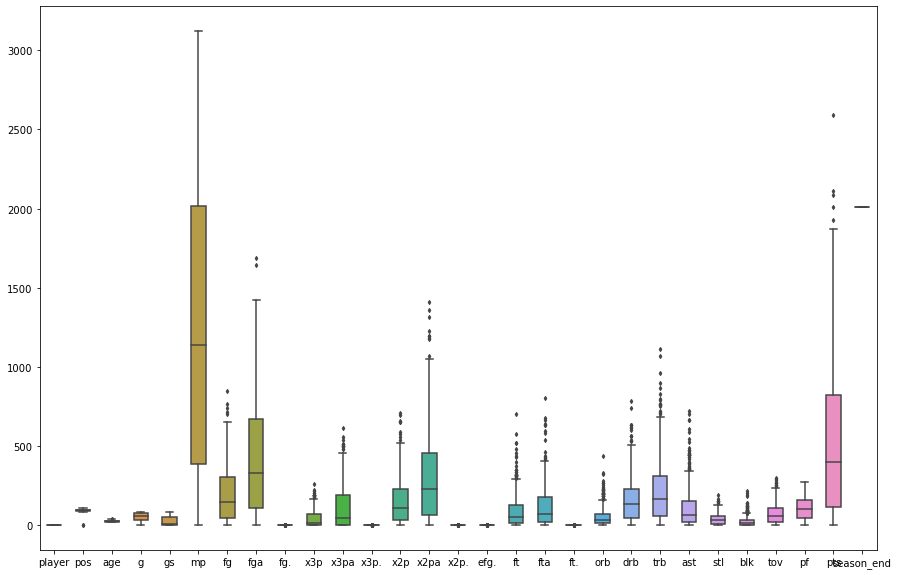

In [176]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=nba_new, width= 0.5,ax=ax,  fliersize=3)

array([[<AxesSubplot:title={'center':'player'}>,
        <AxesSubplot:title={'center':'pos'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'g'}>,
        <AxesSubplot:title={'center':'gs'}>],
       [<AxesSubplot:title={'center':'mp'}>,
        <AxesSubplot:title={'center':'fg'}>,
        <AxesSubplot:title={'center':'fga'}>,
        <AxesSubplot:title={'center':'fg.'}>,
        <AxesSubplot:title={'center':'x3p'}>],
       [<AxesSubplot:title={'center':'x3pa'}>,
        <AxesSubplot:title={'center':'x3p.'}>,
        <AxesSubplot:title={'center':'x2p'}>,
        <AxesSubplot:title={'center':'x2pa'}>,
        <AxesSubplot:title={'center':'x2p.'}>],
       [<AxesSubplot:title={'center':'efg.'}>,
        <AxesSubplot:title={'center':'ft'}>,
        <AxesSubplot:title={'center':'fta'}>,
        <AxesSubplot:title={'center':'ft.'}>,
        <AxesSubplot:title={'center':'orb'}>],
       [<AxesSubplot:title={'center':'drb'}>,
        <AxesSubplot:title={

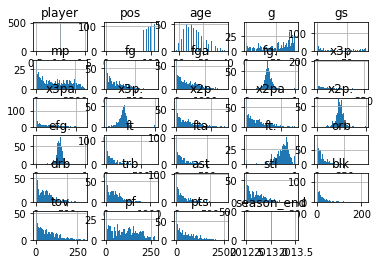

In [177]:
figsize=(15,10)
figure=nba_new.hist(bins=50)
figure

In [178]:
IQR=nba_new.quantile(0.75)-nba_new.quantile(0.25)

In [179]:

lower_bridge=nba_new.quantile(0.25)-(IQR*1.5)
upper_bridge=nba_new.quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge),print(nba_new.mean())

player           1.000000
pos             76.500000
age             14.000000
g              -34.000000
gs             -81.000000
mp           -2054.000000
fg            -343.000000
fga           -733.000000
fg.              0.282000
x3p           -102.000000
x3pa          -282.000000
x3p.             0.023389
x2p           -267.500000
x2pa          -521.000000
x2p.             0.316204
efg.             0.338500
ft            -149.000000
fta           -213.500000
ft.              0.403500
orb            -79.500000
drb           -237.500000
trb           -327.500000
ast           -178.000000
stl            -67.500000
blk            -38.000000
tov           -109.500000
pf            -127.000000
pts           -944.000000
season_end    2013.000000
dtype: float64
player           1.000000
pos            112.500000
age             38.000000
g              142.000000
gs             135.000000
mp            4458.000000
fg             697.000000
fga           1515.000000
fg.              0.5980

(None, None, None)

In [180]:
lower_bridge=nba_new.quantile(0.25)-(IQR*3)
upper_bridge=nba_new.quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

player           1.000000
pos             63.000000
age              5.000000
g             -100.000000
gs            -162.000000
mp           -4496.000000
fg            -733.000000
fga          -1576.000000
fg.              0.163500
x3p           -204.000000
x3pa          -567.000000
x3p.            -0.187578
x2p           -566.000000
x2pa         -1109.000000
x2p.             0.197690
efg.             0.226000
ft            -314.000000
fta           -449.000000
ft.              0.153000
orb           -171.000000
drb           -518.000000
trb           -710.000000
ast           -376.000000
stl           -144.000000
blk            -80.000000
tov           -240.000000
pf            -298.000000
pts          -2003.000000
season_end    2013.000000
dtype: float64
player           1.000000
pos            126.000000
age             47.000000
g              208.000000
gs             216.000000
mp            6900.000000
fg            1087.000000
fga           2358.000000
fg.              0.7165

(None, None)

In [181]:
print(nba_new.mean())

player           1.000000
pos             96.101871
age             26.509356
g               53.253638
gs              25.571726
mp            1237.386694
fg             192.881497
fga            424.463617
fg.              0.436436
x3p             39.613306
x3pa           110.130977
x3p.             0.285111
x2p            153.268191
x2pa           314.332640
x2p.             0.466947
efg.             0.480752
ft              91.205821
fta            120.642412
ft.              0.722419
orb             55.810811
drb            162.817048
trb            218.627859
ast            112.536383
stl             39.280665
blk             24.103950
tov             71.862786
pf             105.869023
pts            516.582121
season_end    2013.000000
dtype: float64


In [182]:
nba_new1 = nba_new[((nba_new<upper_bridge) | (nba_new>lower_bridge)).any(axis=1)]
nba_new1.shape

(481, 29)

In [183]:
nba_new2 = nba_new[((nba_new>upper_bridge) | (nba_new<lower_bridge)).any(axis=1)]
nba_new2.shape

(49, 29)

<AxesSubplot:>

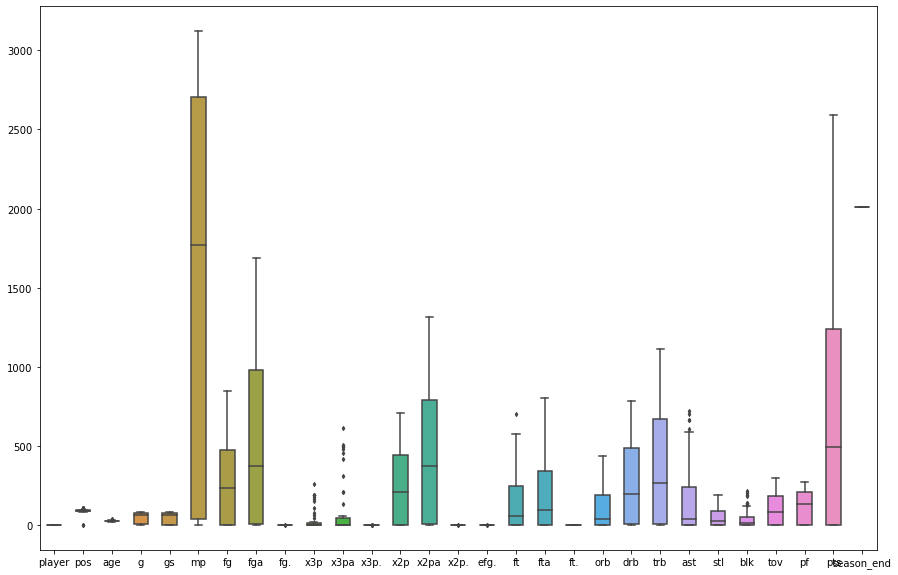

In [184]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=nba_new2, width= 0.5,ax=ax,  fliersize=3)

<AxesSubplot:>

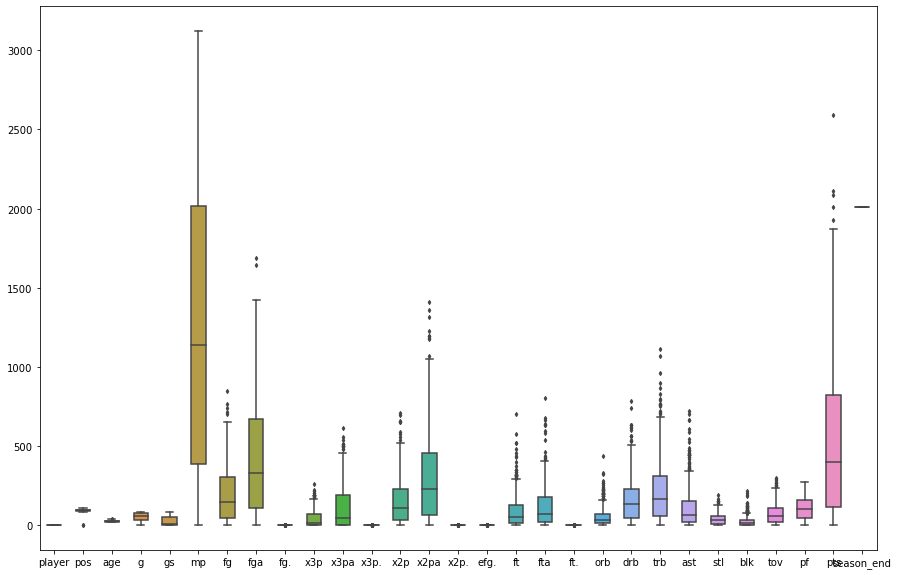

In [185]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=nba_new1, width= 0.5,ax=ax,  fliersize=3)

In [186]:
nba_new2.isnull().sum()

player         0
pos            0
age            0
g              0
gs             0
mp             0
fg             0
fga            0
fg.            0
x3p            0
x3pa           0
x3p.          13
x2p            0
x2pa           0
x2p.           0
efg.           0
ft             0
fta            0
ft.            8
orb            0
drb            0
trb            0
ast            0
stl            0
blk            0
tov            0
pf             0
pts            0
season_end     0
dtype: int64

In [137]:
nba_new2.drop(['x3p.', 'ft.'], axis=1)

,player,pos,age,g,gs,mp,fg,fga,fg.,x3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
17,1,96,29,77,77,2982,743,1643,0.452,167,...,145,477,622,242,95,51,198,224,2112,2013
46,1,90,27,6,0,45,1,1,1.000,0,...,2,15,17,0,0,0,2,6,3,2013
55,1,90,29,67,67,1769,235,375,0.627,0,...,182,489,671,112,47,121,97,210,492,2013
63,1,99,28,24,3,160,3,15,0.200,1,...,2,12,14,10,6,1,2,4,7,2013
109,1,85,23,2,0,13,1,3,0.333,1,...,0,1,1,0,2,0,0,0,3,2013
110,1,85,25,78,78,2846,652,1383,0.471,261,...,46,288,334,666,128,14,294,194,1873,2013
115,1,90,20,67,66,2358,522,1005,0.519,2,...,207,466,673,105,89,189,109,200,1394,2013
123,1,109,24,79,79,3017,604,1407,0.429,64,...,51,292,343,313,86,28,176,197,1791,2013
125,1,90,24,60,15,818,113,227,0.498,1,...,103,197,300,39,30,50,54,108,286,2013
129,1,90,20,81,81,2619,479,769,0.623,0,...,440,631,1071,35,101,131,110,273,1095,2013


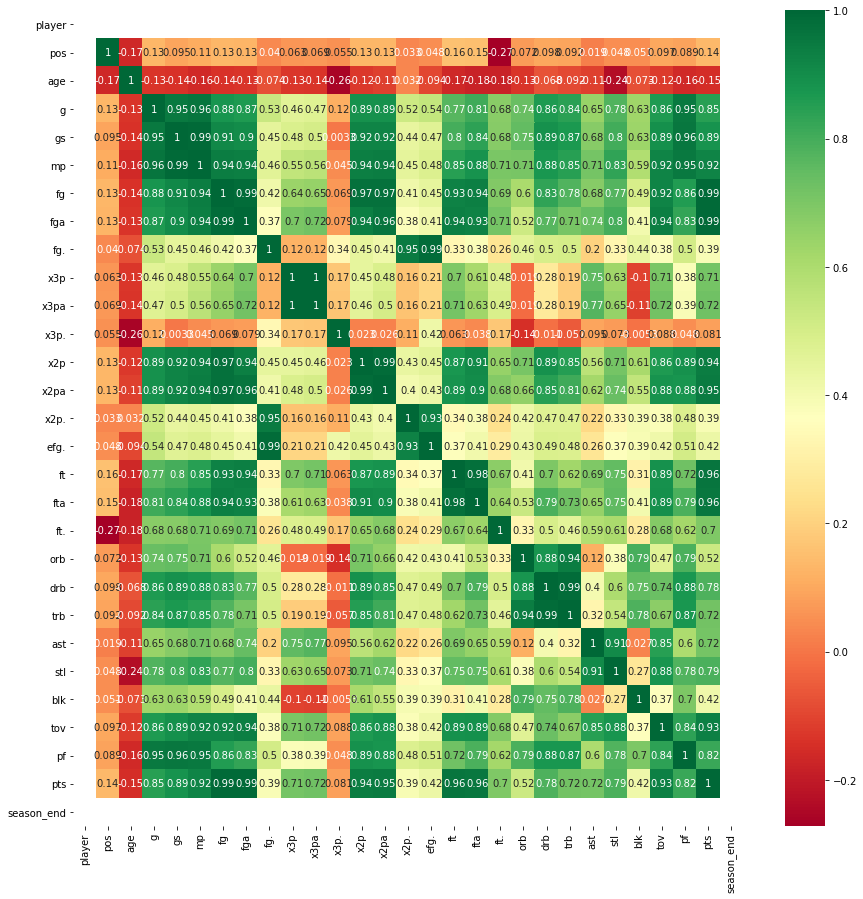

In [187]:
corrmat = nba_new2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(nba_new2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [188]:
X = nba_new2.drop(columns = ['pts'],axis=1)
y = nba_new2['pts']

In [189]:
X=X.replace(np.nan, 0)
X

,player,pos,age,g,gs,mp,fg,fga,fg.,x3p,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,season_end
17,1,96,29,77,77,2982,743,1643,0.452,167,...,0.848,145,477,622,242,95,51,198,224,2013
46,1,90,27,6,0,45,1,1,1.000,0,...,0.167,2,15,17,0,0,0,2,6,2013
55,1,90,29,67,67,1769,235,375,0.627,0,...,0.344,182,489,671,112,47,121,97,210,2013
63,1,99,28,24,3,160,3,15,0.200,1,...,0.000,2,12,14,10,6,1,2,4,2013
109,1,85,23,2,0,13,1,3,0.333,1,...,0.000,0,1,1,0,2,0,0,0,2013
110,1,85,25,78,78,2846,652,1383,0.471,261,...,0.885,46,288,334,666,128,14,294,194,2013
115,1,90,20,67,66,2358,522,1005,0.519,2,...,0.791,207,466,673,105,89,189,109,200,2013
123,1,109,24,79,79,3017,604,1407,0.429,64,...,0.824,51,292,343,313,86,28,176,197,2013
125,1,90,24,60,15,818,113,227,0.498,1,...,0.634,103,197,300,39,30,50,54,108,2013
129,1,90,20,81,81,2619,479,769,0.623,0,...,0.418,440,631,1071,35,101,131,110,273,2013


In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [191]:
X_scaled

array([[ 0.        ,  0.28842047,  0.69938985, ...,  1.05359731,
         1.06097759,  0.        ],
       [ 0.        , -0.0133433 ,  0.1721575 , ..., -0.9429987 ,
        -1.0193019 ,  0.        ],
       [ 0.        , -0.0133433 ,  0.69938985, ...,  0.02473916,
         0.92738166,  0.        ],
       ...,
       [ 0.        , -0.2648131 , -0.8823072 , ...,  2.04170861,
         1.01326476,  0.        ],
       [ 0.        ,  0.28842047,  0.1721575 , ..., -0.96337213,
        -1.06701473,  0.        ],
       [ 0.        ,  0.28842047, -1.14592337, ..., -0.96337213,
        -1.05747216,  0.        ]])

In [192]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [193]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import KFold

In [194]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [195]:

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [196]:
pred = knn.predict(x_test)

In [197]:
print(confusion_matrix(y_test,pred))

[[2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]]


In [198]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
         141       0.00      0.00      0.00         1
         781       0.00      0.00      0.00         1
         856       0.00      0.00      0.00         0
         871       0.00      0.00      0.00         0
        1007       0.00      0.00      0.00         0
        1095       0.00      0.00      0.00         1
        1297       0.00      0.00      0.00         1

    accuracy                           0.15        13
   macro avg       0.02      0.07      0.04        13
weighted avg       0.05      0.15      0.08        13



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [199]:
knn.score(x_train,y_train)

0.25

In [200]:
print("The accuracy score is : ", accuracy_score(y_test,pred))

The accuracy score is :  0.15384615384615385


In [201]:
accuracy_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_scaled,y,cv=5)
    accuracy_rate.append(score.mean())

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least

In [202]:
error_rate = []
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_scaled,y,cv=5)
    error_rate.append(1-score.mean())

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least

In [203]:
error_rate = []
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'accuracy Rate')

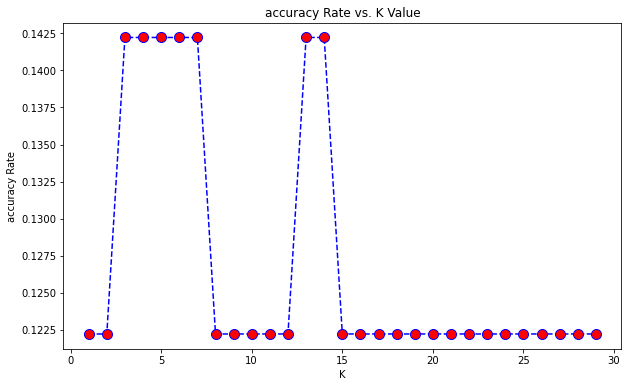

In [204]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy Rate')

Text(0, 0.5, 'error Rate')

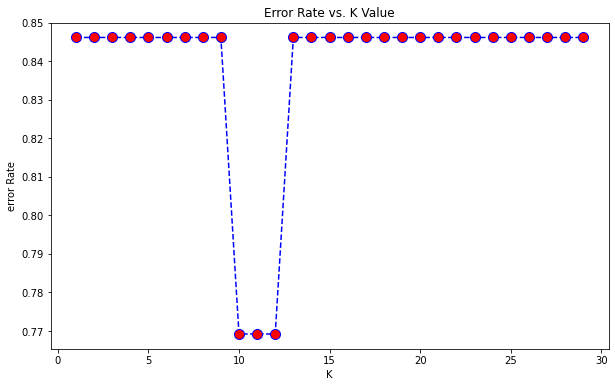

In [205]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('error Rate')

In [206]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [207]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=15


[[2 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]]




C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.20      1.00      0.33         2
           1       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
         141       0.00      0.00      0.00         1
         492       0.00      0.00      0.00         0
         781       0.00      0.00      0.00         1
        1095       0.00      0.00      0.00         1
        1297       0.00      0.00      0.00         1

    accuracy                           0.15        13
   macro avg       0.02      0.09      0.03        13
weighted avg       0.03      0.15      0.05        13



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## frequency of webpage

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
from nltk.corpus import stopwords
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [59]:
text=soup.get_text(strip=True)
text

"PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesErrorsExceptionsGeneratorsAttributesReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUsing Register GlobalsUser Submitted DataHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Specific ExtensionsC

In [60]:
tokens=[t for t in text.split()]
tokens

['PHP:',
 'Hypertext',
 'PreprocessorDownloadsDocumentationGet',
 'InvolvedHelpGetting',
 'StartedIntroductionA',
 'simple',
 'tutorialLanguage',
 'ReferenceBasic',
 'syntaxTypesVariablesConstantsExpressionsOperatorsControl',
 'StructuresFunctionsClasses',
 'and',
 'ObjectsNamespacesErrorsExceptionsGeneratorsAttributesReferences',
 'ExplainedPredefined',
 'VariablesPredefined',
 'ExceptionsPredefined',
 'Interfaces',
 'and',
 'ClassesContext',
 'options',
 'and',
 'parametersSupported',
 'Protocols',
 'and',
 'WrappersSecurityIntroductionGeneral',
 'considerationsInstalled',
 'as',
 'CGI',
 'binaryInstalled',
 'as',
 'an',
 'Apache',
 'moduleSession',
 'SecurityFilesystem',
 'SecurityDatabase',
 'SecurityError',
 'ReportingUsing',
 'Register',
 'GlobalsUser',
 'Submitted',
 'DataHiding',
 'PHPKeeping',
 'CurrentFeaturesHTTP',
 'authentication',
 'with',
 'PHPCookiesSessionsDealing',
 'with',
 'XFormsHandling',
 'file',
 'uploadsUsing',
 'remote',
 'filesConnection',
 'handlingPersisten

In [61]:
clean_tokens=tokens[:]
clean_tokens

['PHP:',
 'Hypertext',
 'PreprocessorDownloadsDocumentationGet',
 'InvolvedHelpGetting',
 'StartedIntroductionA',
 'simple',
 'tutorialLanguage',
 'ReferenceBasic',
 'syntaxTypesVariablesConstantsExpressionsOperatorsControl',
 'StructuresFunctionsClasses',
 'and',
 'ObjectsNamespacesErrorsExceptionsGeneratorsAttributesReferences',
 'ExplainedPredefined',
 'VariablesPredefined',
 'ExceptionsPredefined',
 'Interfaces',
 'and',
 'ClassesContext',
 'options',
 'and',
 'parametersSupported',
 'Protocols',
 'and',
 'WrappersSecurityIntroductionGeneral',
 'considerationsInstalled',
 'as',
 'CGI',
 'binaryInstalled',
 'as',
 'an',
 'Apache',
 'moduleSession',
 'SecurityFilesystem',
 'SecurityDatabase',
 'SecurityError',
 'ReportingUsing',
 'Register',
 'GlobalsUser',
 'Submitted',
 'DataHiding',
 'PHPKeeping',
 'CurrentFeaturesHTTP',
 'authentication',
 'with',
 'PHPCookiesSessionsDealing',
 'with',
 'XFormsHandling',
 'file',
 'uploadsUsing',
 'remote',
 'filesConnection',
 'handlingPersisten

In [132]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [133]:
sr=stopwords.words('english')

In [135]:
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq=nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key)+':'+str(val))
        

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsAttributesReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
BehaviourAudio:1
Format

## image compression of racoon

In [45]:
import numpy as np
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

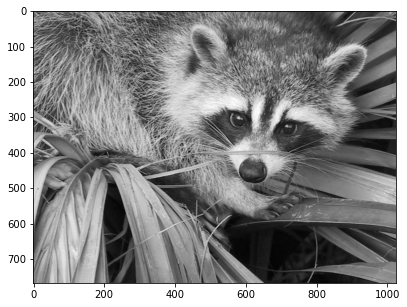

In [46]:
face = scipy.misc.face(gray=True)
plt.figure(figsize=(10, 5))
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

In [47]:
rows = face.shape[0]
cols = face.shape[1]

In [48]:
image = face.reshape(rows*cols,1)
kmeans = KMeans(n_clusters = 5,init = 'k-means++', random_state = 42)
kmeans.fit(image)

KMeans(n_clusters=5, random_state=42)

In [49]:
clusters = np.asarray(kmeans.cluster_centers_) 
labels = np.asarray(kmeans.labels_)  
labels = labels.reshape(rows,cols)

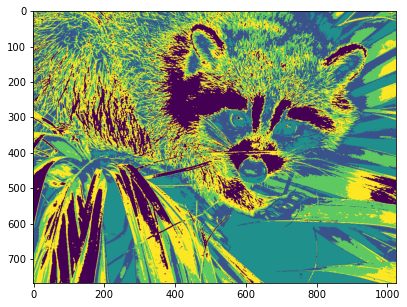

In [50]:
plt.imsave('compressed_racoon.png',labels)
image = plt.imread('compressed_racoon.png')
plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.show()

## iris data

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [54]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
principalComponents = pca.fit_transform(iris.data)


In [55]:
y=iris.target

Text(0.5, 0.92, 'Iris 3D dataset')

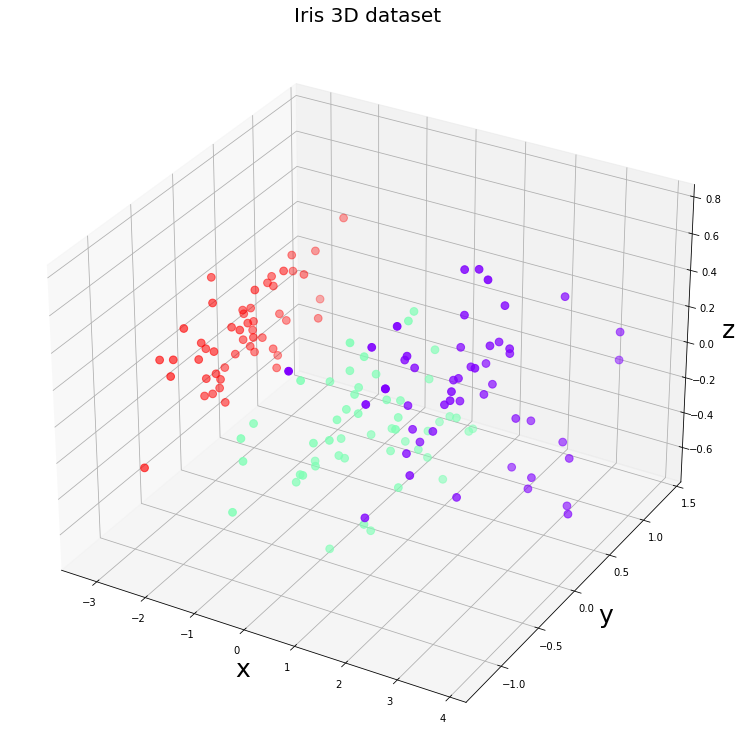

In [56]:
fig=plt.figure(figsize=(10,10))
ax=Axes3D(fig,azim=-60,elev=30)
ax.scatter(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2], c=y,s=60,cmap=plt.cm.rainbow_r)
ax.set_xlabel('x',fontsize=25)
ax.set_ylabel('y',fontsize=25)
ax.set_zlabel('z',fontsize=25)
ax.set_title('Iris 3D dataset', fontsize = 20)   
